In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [52]:
uri = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv'
dados = pd.read_csv(uri, sep=';', encoding='ISO-8859-1', skiprows=3, skipfooter=16, engine='python')
dados.to_csv('../dados/tuberculose_ano_mes_diagnostico.csv', index_label = False)
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [53]:
dados.drop('Total', axis = 1, inplace=True)
dados.drop(19, inplace=True)


In [54]:
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [55]:
dados_st = dados.melt(id_vars='Ano Diagnóstico', value_name='casos', var_name='Mês')
dados_st

,Ano Diagnóstico,Mês,casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [56]:
a_converter_mes = dict(zip(dados_st['Mês'].unique(),np.arange(1,13)))
a_converter_mes['Jan']

1

In [57]:
dados_st['data'] = dados_st['Ano Diagnóstico'] + '-' + (dados_st['Mês'].map(a_converter_mes).apply(str))
dados_st.data = pd.to_datetime(dados_st.data)
dados_st = dados_st[['data', 'casos']]
dados_st

,data,casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


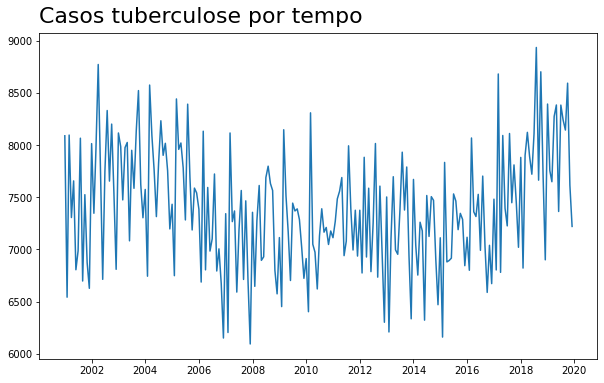

In [58]:
ax = sns.lineplot(x = 'data', y = 'casos', data = dados_st)
ax.figure.set_size_inches(10,6)
ax.set_title('Casos tuberculose por tempo', fontsize =22, loc = 'left', pad = 10)
ax.set_xlabel('', fontsize = 16)
ax.set_ylabel('', fontsize = 16)
ax;


## Medias móveis

In [59]:
dados_st.sort_values(by='data', inplace=True)
dados_st.reset_index(drop=True, inplace=True)

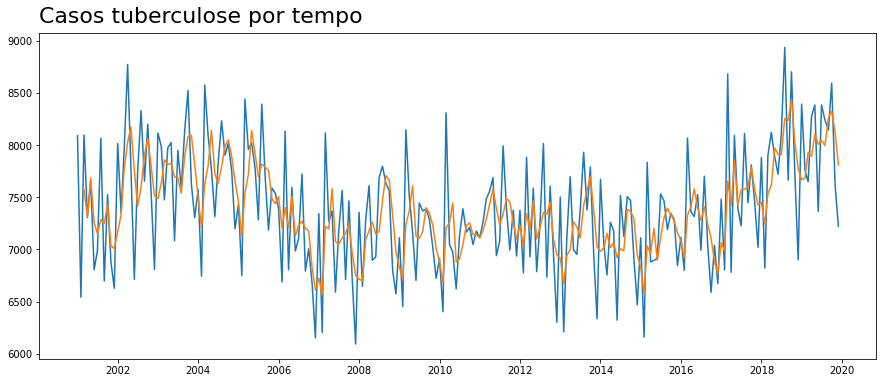

In [60]:
dados_st['media_movel_3'] = dados_st['casos'].rolling(3).mean()
ax = sns.lineplot(x = 'data', y = 'casos', data = dados_st)
ax = sns.lineplot(x = 'data', y = 'media_movel_3', data = dados_st)
ax.figure.set_size_inches(15,6)
ax.set_title('Casos tuberculose por tempo', fontsize =22, loc = 'left', pad = 10)
ax.set_xlabel('', fontsize = 16)
ax.set_ylabel('', fontsize = 16)
ax;


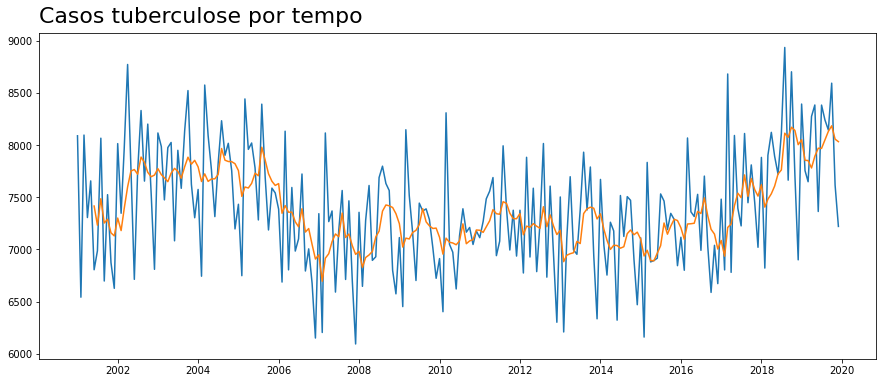

In [61]:
dados_st['media_movel_6'] = dados_st['casos'].rolling(6).mean()
ax = sns.lineplot(x = 'data', y = 'casos', data = dados_st)
ax = sns.lineplot(x = 'data', y = 'media_movel_6', data = dados_st)
ax.figure.set_size_inches(15,6)
ax.set_title('Casos tuberculose por tempo', fontsize =22, loc = 'left', pad = 10)
ax.set_xlabel('', fontsize = 16)
ax.set_ylabel('', fontsize = 16)
ax;


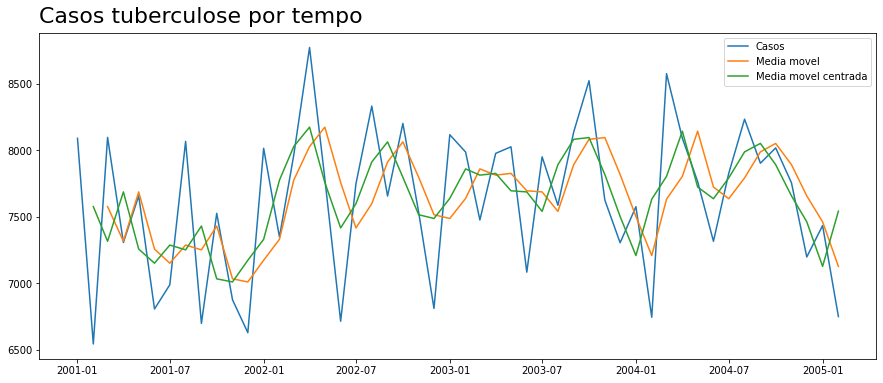

In [62]:
dados_st['media_movel_3c'] = dados_st['casos'].rolling(3, center=True).mean()
ax = sns.lineplot(x = 'data', y = 'casos', data = dados_st[:50], label = 'Casos')
ax = sns.lineplot(x = 'data', y = 'media_movel_3', data = dados_st[:50], label = 'Media movel')
ax = sns.lineplot(x = 'data', y = 'media_movel_3c', data = dados_st[:50], label = 'Media movel centrada')
ax.figure.set_size_inches(15,6)
ax.set_title('Casos tuberculose por tempo', fontsize =22, loc = 'left', pad = 10)
ax.set_xlabel('', fontsize = 16)
ax.set_ylabel('', fontsize = 16)
ax;


## Tentando encontrar padroes

<AxesSubplot:xlabel='data', ylabel='casos'>

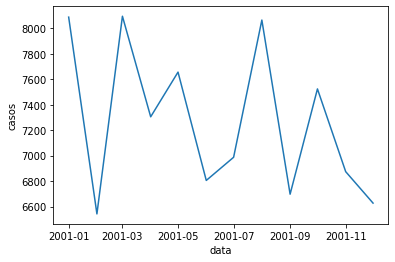

In [63]:
sns.lineplot(x = 'data', y = 'casos', data = dados_st[:12])

In [64]:
dados_st['ano'] = dados_st['data'].dt.year
dados_st['mes'] = dados_st['data'].dt.month

<AxesSubplot:xlabel='mes', ylabel='casos'>

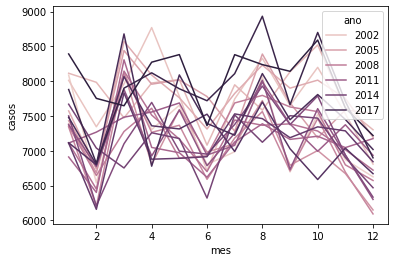

In [65]:
# Muito ruim, não da para analisar
sns.lineplot(x = 'mes', y = 'casos', data = dados_st, hue = 'ano')


In [66]:
decomposicao = seasonal_decompose(dados_st[['data', 'casos']].set_index('data'))

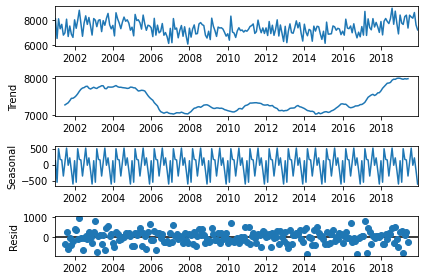

In [67]:
decomposicao.plot();

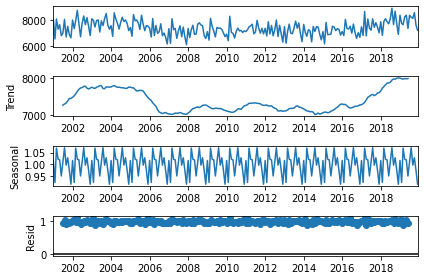

In [68]:
decomposicao = seasonal_decompose(dados_st[['data', 'casos']].set_index('data'), model = 'multiplicative')
decomposicao.plot();

### outro exemplo

In [69]:
uri_passageiros = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv'
dados_passageiros = pd.read_csv(uri_passageiros)

In [70]:
dados_passageiros.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [71]:
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [72]:
dados_passageiros.Month = pd.to_datetime(dados_passageiros.Month)

In [73]:
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


<AxesSubplot:xlabel='Month', ylabel='#Passengers'>

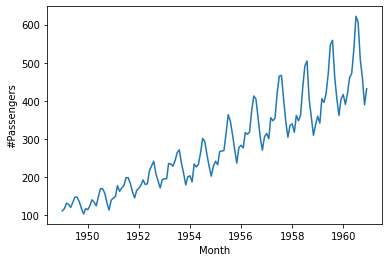

In [74]:
sns.lineplot(x = 'Month', y = '#Passengers', data = dados_passageiros)

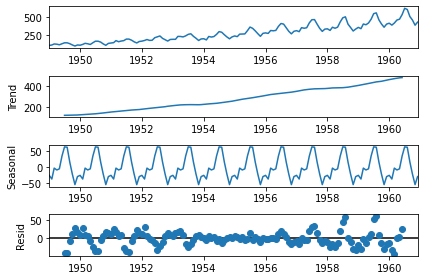

In [75]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index('Month'))
decomposicao_p.plot();

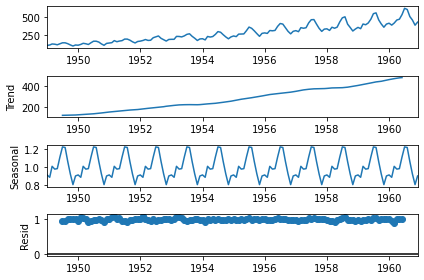

In [76]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index('Month'), model='multiplicative')
pao = decomposicao_p.plot();

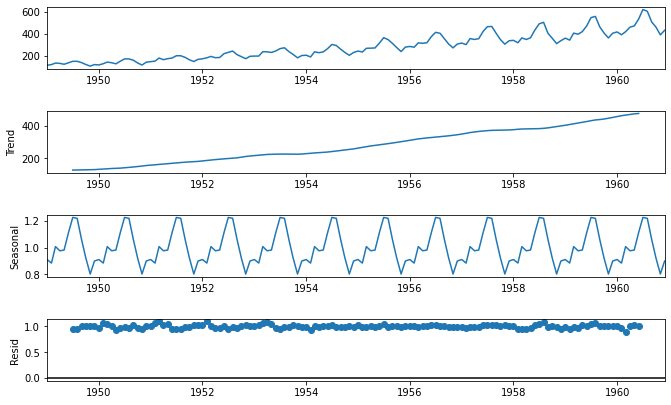

In [77]:
pao.set_size_inches(10, 6)
pao

## Autocorrelação

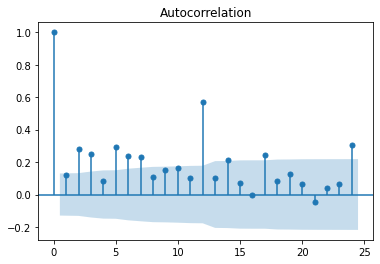

In [78]:
plot_acf(dados_st['casos']);

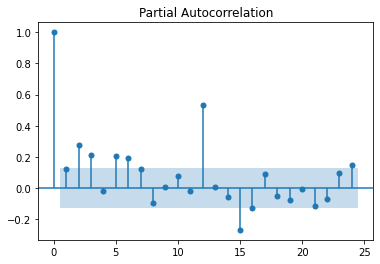

In [79]:
plot_pacf(dados_st['casos']);

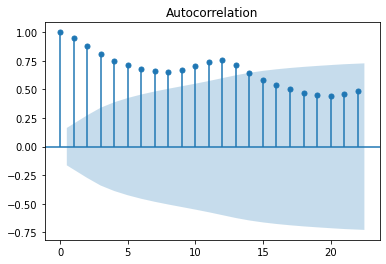

In [80]:
plot_acf(dados_passageiros['#Passengers']);

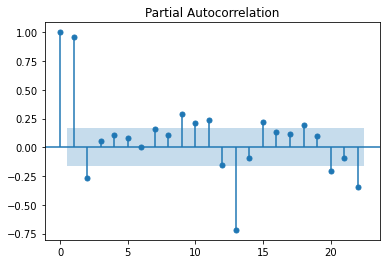

In [81]:
plot_pacf(dados_passageiros['#Passengers']);

# Parte 05

In [82]:
dados_passageiros.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [83]:
dados_passageiros.rename({'Month' : 'data', '#Passengers' : 'passageiros'}, axis = 1, inplace=True)

In [84]:
dados_passageiros['mes'] = dados_passageiros.data.dt.month
dados_passageiros.head()

,data,passageiros,mes
0,1949-01-01,112,1
1,1949-02-01,118,2
2,1949-03-01,132,3
3,1949-04-01,129,4
4,1949-05-01,121,5


In [85]:
dados_passageiros['ano'] = dados_passageiros.data.dt.year
dados_passageiros.head()

,data,passageiros,mes,ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949


<AxesSubplot:xlabel='mes', ylabel='passageiros'>

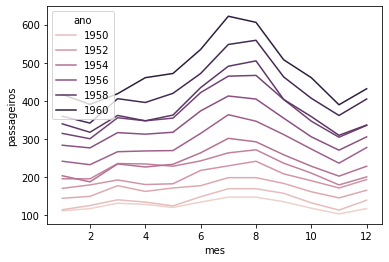

In [86]:
sns.lineplot(x = 'mes', y = 'passageiros', data = dados_passageiros, hue = 'ano')

<AxesSubplot:xlabel='Month'>

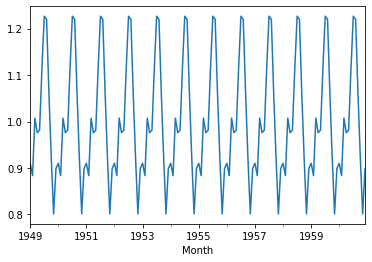

In [87]:
decomposicao_p.seasonal.plot()

<AxesSubplot:xlabel='Month'>

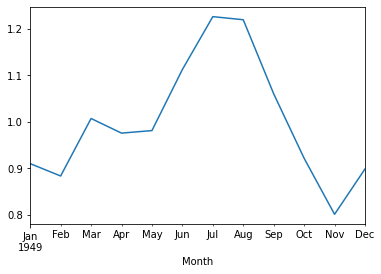

In [88]:
# Sasonalidade dos dados de passageiros

decomposicao_p.seasonal[:12].plot()

<AxesSubplot:xlabel='data'>

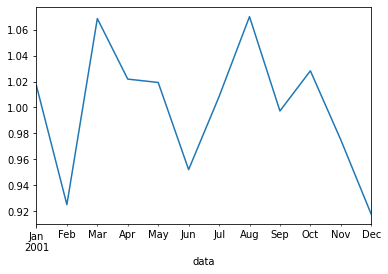

In [89]:
# Sasonalidade tuberculose

decomposicao.seasonal[:12].plot()

## Previsão ARIMA

In [90]:
from statsmodels.tsa.arima_model import ARIMA

dados_treino = dados_st.query('ano != 2019')
dados_teste = dados_st.query('ano == 2019')



modelo_arima = ARIMA(dados_treino.casos.values.astype('float32'), order = [0,0,0])
modelo_arima_treinado = modelo_arima.fit()

In [91]:
modelo_arima_treinado.forecast(12)

# Forecast retorna o valor previsto, residuo e o intervalo de confiança

(array([7355.33333534, 7355.33333534, 7355.33333534, 7355.33333534,
        7355.33333534, 7355.33333534, 7355.33333534, 7355.33333534,
        7355.33333534, 7355.33333534, 7355.33333534, 7355.33333534]),
 array([554.13959834, 554.13959834, 554.13959834, 554.13959834,
        554.13959834, 554.13959834, 554.13959834, 554.13959834,
        554.13959834, 554.13959834, 554.13959834, 554.13959834]),
 array([[6269.2396802 , 8441.42699049],
        [6269.2396802 , 8441.42699049],
        [6269.2396802 , 8441.42699049],
        [6269.2396802 , 8441.42699049],
        [6269.2396802 , 8441.42699049],
        [6269.2396802 , 8441.42699049],
        [6269.2396802 , 8441.42699049],
        [6269.2396802 , 8441.42699049],
        [6269.2396802 , 8441.42699049],
        [6269.2396802 , 8441.42699049],
        [6269.2396802 , 8441.42699049],
        [6269.2396802 , 8441.42699049]]))

In [92]:
previsao, _, _ =modelo_arima_treinado.forecast(12)


In [93]:
dados_teste['previsao'] = previsao

<AxesSubplot:xlabel='data', ylabel='casos'>

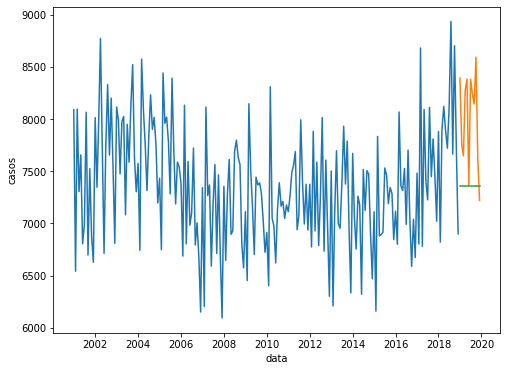

In [94]:
plt.figure(figsize=(8,6))
sns.lineplot(x = 'data', y = 'casos', data = dados_treino)
sns.lineplot(x = 'data', y = 'casos', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao', data = dados_teste)

**O modelo está fazendo a média dos dados como previsão, péssimo modelo. O hiper parametro 'order' deve ser analisado**

## Ajustando parametros

In [95]:
from statsmodels.tsa.arima_model import ARIMA

dados_treino = dados_st.query('ano != 2019')
dados_teste = dados_st.query('ano == 2019')



modelo_arima = ARIMA(dados_treino.casos.values.astype('float32'), order = [12,1,2])
modelo_arima_treinado = modelo_arima.fit()

previsao, _, _ =modelo_arima_treinado.forecast(12)

dados_teste['previsao'] = previsao

<AxesSubplot:xlabel='data', ylabel='casos'>

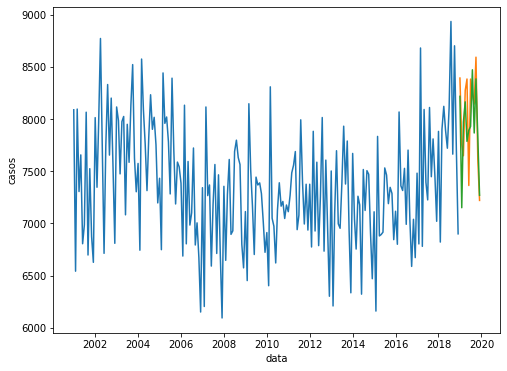

In [96]:
plt.figure(figsize=(8,6))
sns.lineplot(x = 'data', y = 'casos', data = dados_treino)
sns.lineplot(x = 'data', y = 'casos', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao', data = dados_teste)

## Aplicação modelo ARIMA à passageiros

In [97]:
from statsmodels.tsa.arima_model import ARIMA

dados_treino_passageiros = dados_passageiros.query('ano != 1960')
dados_teste_passageiros = dados_passageiros.query('ano == 1960')



modelo_arima = ARIMA(dados_treino_passageiros.passageiros.values.astype('float32'), order = [2,1,2])
modelo_arima_treinado = modelo_arima.fit()

previsao, _, _ =modelo_arima_treinado.forecast(12)

dados_teste_passageiros['previsao'] = previsao

<AxesSubplot:xlabel='data', ylabel='passageiros'>

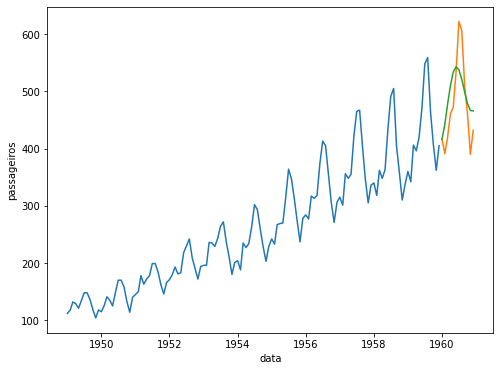

In [98]:
plt.figure(figsize=(8,6))
sns.lineplot(x = 'data', y = 'passageiros', data = dados_treino_passageiros)
sns.lineplot(x = 'data', y = 'passageiros', data = dados_teste_passageiros)
sns.lineplot(x = 'data', y = 'previsao', data = dados_teste_passageiros)

<AxesSubplot:>

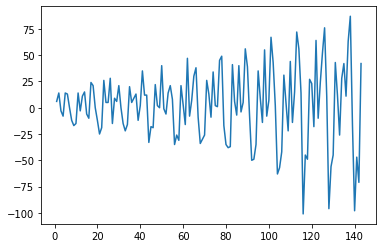

In [99]:
dados_passageiros.passageiros.diff().plot()

# Parte 06

In [100]:
from pmdarima.arima import auto_arima

In [101]:
modelo_autoarima = auto_arima(
    dados_treino.casos.values, error_action='ignore', trace=True,
    seasonal=True, m = 12
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=1.19 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=0.68 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=1.48 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=0.55 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=2.36 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3

In [102]:
previsao_autoarima = modelo_autoarima.predict(12)

dados_teste['previsao_autoarima'] = previsao_autoarima

<AxesSubplot:xlabel='data', ylabel='casos'>

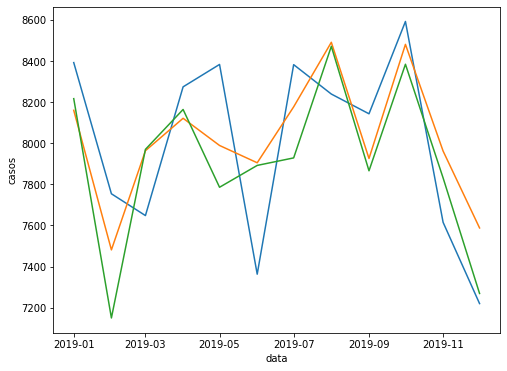

In [103]:
plt.figure(figsize=(8,6))
# sns.lineplot(x = 'data', y = 'casos', data = dados_treino)
sns.lineplot(x = 'data', y = 'casos', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao_autoarima', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao', data = dados_teste)

In [104]:
from sklearn.metrics import mean_squared_error

In [107]:
resultado_autoarima = mean_squared_error(dados_teste.casos, dados_teste.previsao_autoarima)
resultado_arima = mean_squared_error(dados_teste.casos, dados_teste.previsao)

print(f'Autoarima = {resultado_autoarima}')
print(f'Arima = {resultado_arima}')


Autoarima = 93378.93285709801
Arima = 131384.60912044928


ImportError: DLL load failed while importing _api: Não foi possível encontrar o módulo especificado.